In [1]:
from qiskit import *

In [4]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0, 1, 2], [0, 1, 2])

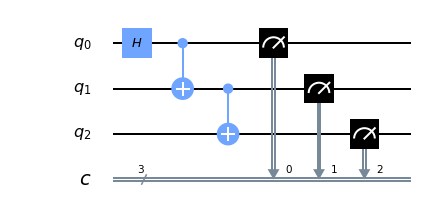

In [5]:
%matplotlib inline
circuit.draw(output='mpl')

In [8]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()

In [9]:
from qiskit.visualization import plot_histogram

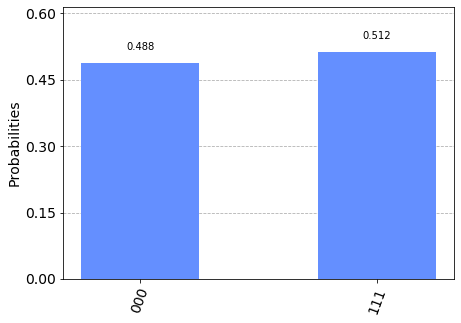

In [10]:
plot_histogram(sim_result.get_counts(circuit))

In [11]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

In [12]:
device = provider.get_backend('ibmqx2')

In [13]:
job = execute(circuit, backend=device, shots=1024)

In [14]:
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5e7837c46a41440018d70da9
Job Status: job has successfully run


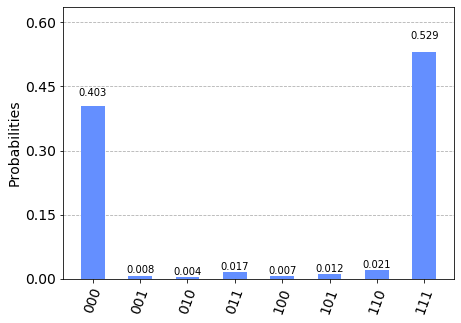

In [16]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit)) 

In [17]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [19]:
cal_circuits, state_labels = complete_meas_cal (qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

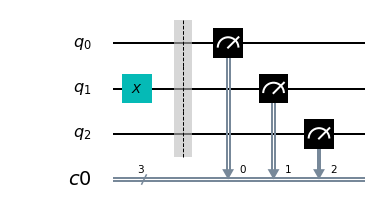

In [20]:
cal_circuits[2].draw(output='mpl')

In [21]:
len(cal_circuits)

8

In [24]:
cal_job = execute(cal_circuits, backend = device, shots = 1024, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5e786bba359df3001946a83e
Job Status: job has successfully run


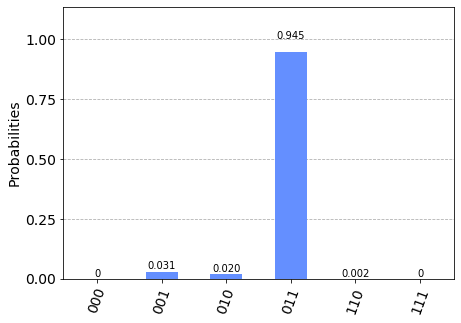

In [25]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [26]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

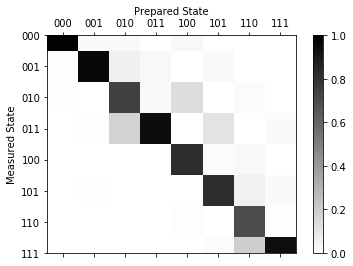

In [27]:
meas_fitter.plot_calibration()

In [28]:
meas_filter = meas_fitter.filter

In [29]:
mitigated_result = meas_filter.apply(device_result)

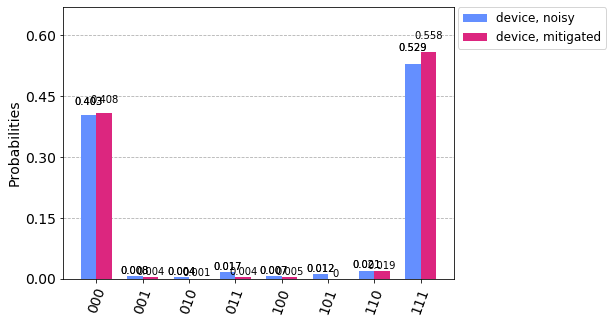

In [31]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend= ['device, noisy', 'device, mitigated'])

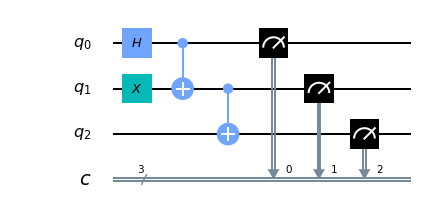

In [33]:
circuit2 = QuantumCircuit(3, 3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0, 1)
circuit2.cx(1, 2)
circuit2.measure([0, 1, 2], [0, 1, 2])
circuit2.draw(output='mpl')

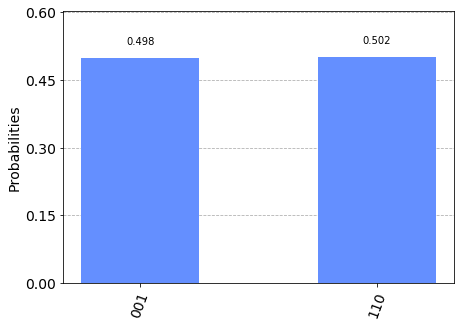

In [34]:
plot_histogram(
    execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2)
)

In [35]:
device_counts_2 = execute(circuit2, backend=device, shots=1024).result().get_counts(circuit2)

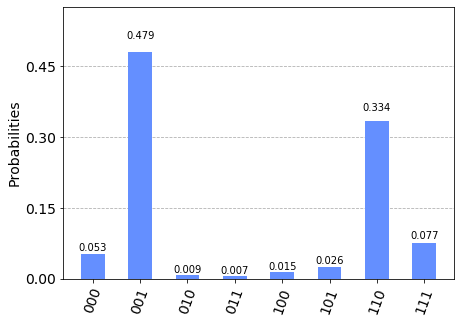

In [36]:
plot_histogram(device_counts_2)

In [37]:
device_mitigated_counts_2 = meas_filter.apply(device_counts_2)

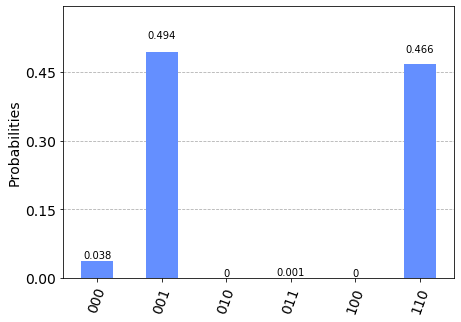

In [38]:
plot_histogram(device_mitigated_counts_2)